In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind

In [15]:
# Load the dataset
file_path = 'Student performance data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


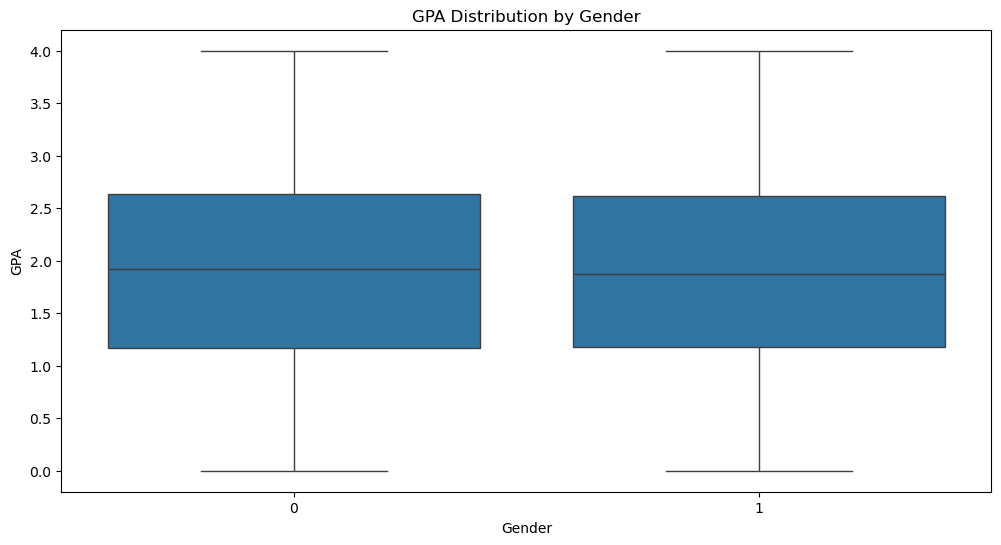

In [16]:
# Objective 1: Understand the Impact of Key Factors on Student Performance

# Analyzing the impact of study habits, parental involvement, and gender on GPA
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='GPA', data=data)
plt.title('GPA Distribution by Gender')
plt.show()

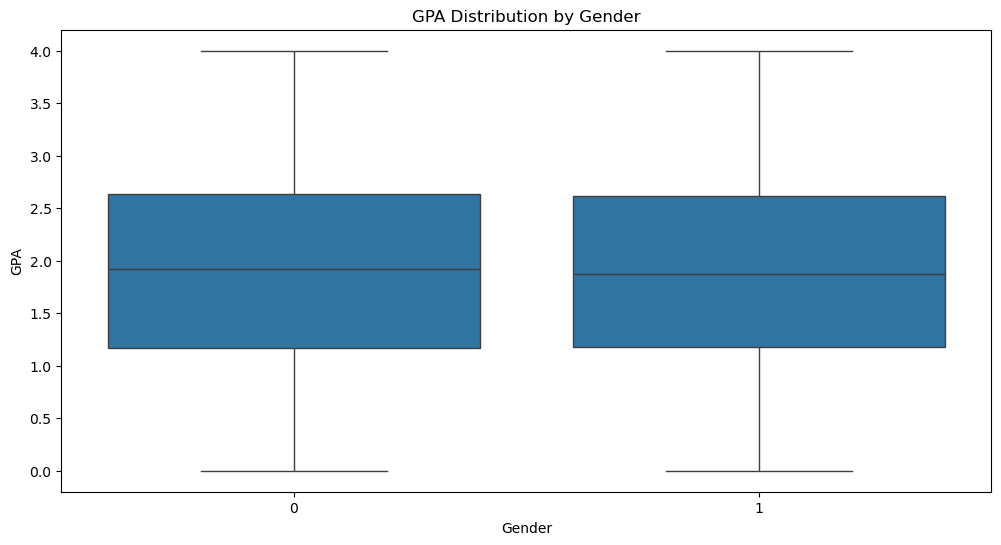

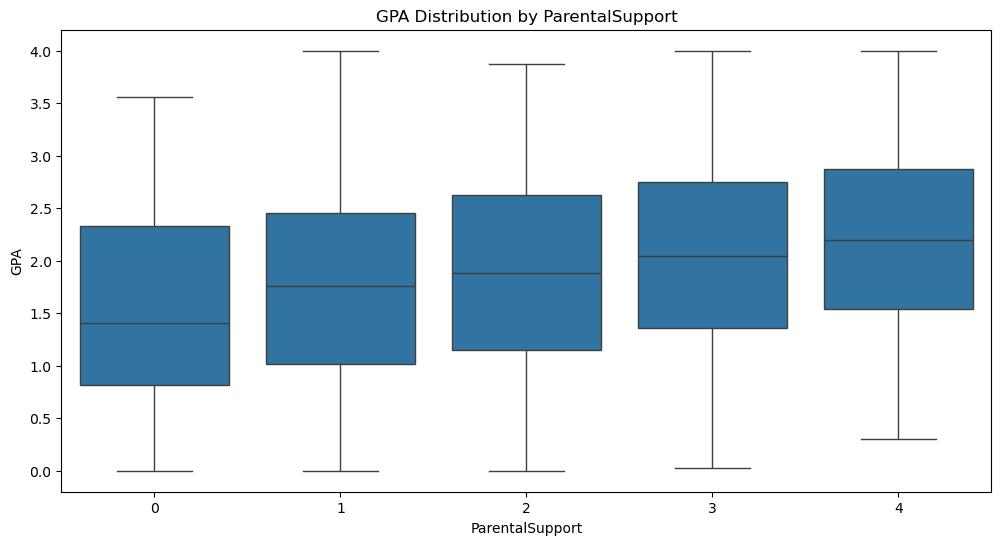

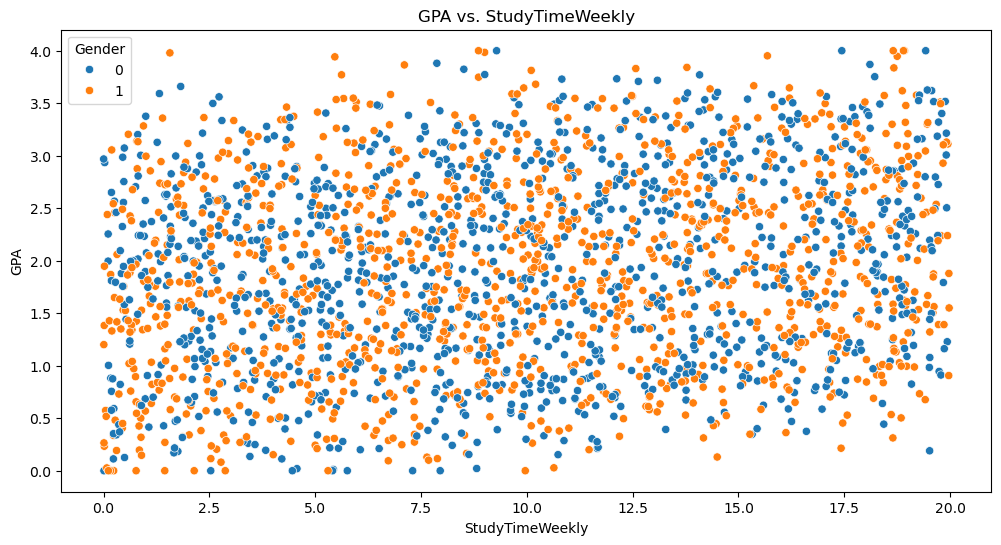

In [27]:
# Objective 1: Understand the Impact of Key Factors on Student Performance

# Analyzing the impact of study habits, parental involvement, and gender on GPA
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='GPA', data=data)
plt.title('GPA Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='ParentalSupport', y='GPA', data=data)
plt.title('GPA Distribution by ParentalSupport')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', hue='Gender', data=data)
plt.title('GPA vs. StudyTimeWeekly')
plt.show()




Correlation between StudyHoursWeekly and GPA: 0.18
Correlation between Absences and GPA: -0.92
Correlation between Tutoring Hours and GPA: 0.15


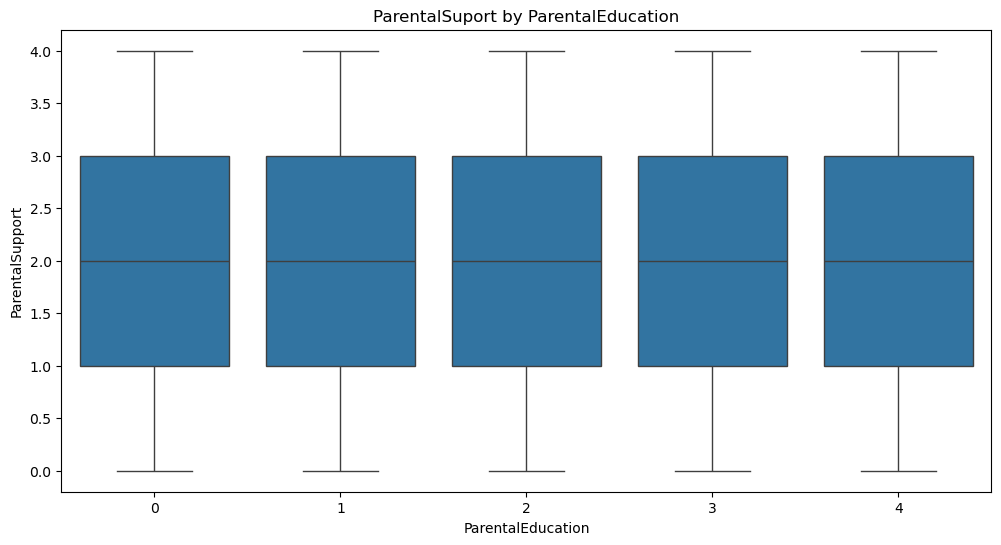

T-test for GPA differences between genders: t-statistic=nan, p-value=nan


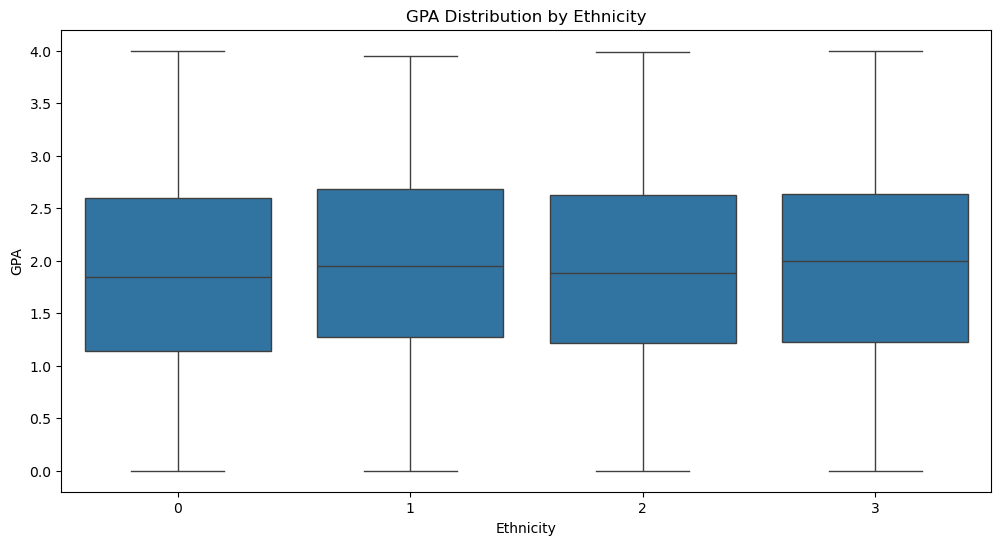

In [50]:
# Objective 2: Test Specific Hypotheses

# Correlation between study time, absences, tutoring, and GPA
corr_study_gpa, _ = pearsonr(data['StudyTimeWeekly'], data['GPA'])
corr_absences_gpa, _ = pearsonr(data['Absences'], data['GPA'])
corr_tutoring_gpa, _ = pearsonr(data['Tutoring'], data['GPA'])

print(f"Correlation between StudyHoursWeekly and GPA: {corr_study_gpa:.2f}")
print(f"Correlation between Absences and GPA: {corr_absences_gpa:.2f}")
print(f"Correlation between Tutoring Hours and GPA: {corr_tutoring_gpa:.2f}")

# Relationship between parental education level and parental involvement
plt.figure(figsize=(12, 6))
sns.boxplot(x='ParentalEducation', y='ParentalSupport', data=data)
plt.title('ParentalSuport by ParentalEducation')
plt.show()

# Gender differences in GPA distribution
male_gpa = data[data['Gender'] == 'Male']['GPA']
female_gpa = data[data['Gender'] == 'Female']['GPA']
t_stat, p_value = ttest_ind(male_gpa, female_gpa)

print(f"T-test for GPA differences between genders: t-statistic={t_stat:.2f}, p-value={p_value:.2f}")

# Potential correlations between ethnicity and GPA
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ethnicity', y='GPA', data=data)
plt.title('GPA Distribution by Ethnicity')
plt.show()


In [52]:
# Objective 3: Provide Data-Driven Insights

# Summary statistics for key variables
summary_stats = data[['GPA', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport']].describe()
print(summary_stats)

               GPA  StudyTimeWeekly     Absences     Tutoring  ParentalSupport
count  2392.000000      2392.000000  2392.000000  2392.000000      2392.000000
mean      1.906186         9.771992    14.541388     0.301421         2.122074
std       0.915156         5.652774     8.467417     0.458971         1.122813
min       0.000000         0.001057     0.000000     0.000000         0.000000
25%       1.174803         5.043079     7.000000     0.000000         1.000000
50%       1.893393         9.705363    15.000000     0.000000         2.000000
75%       2.622216        14.408410    22.000000     1.000000         3.000000
max       4.000000        19.978094    29.000000     1.000000         4.000000


In [54]:
# Objective 4: Support Educational Strategies

# Translating findings into actionable recommendations
if corr_study_gpa > 0.5:
    print("Recommendation: Encourage students to increase study hours for better GPA outcomes.")
if corr_absences_gpa < -0.5:
    print("Recommendation: Implement strategies to reduce absences, as they negatively impact GPA.")
if t_stat > 2:
    print("Recommendation: Address gender disparities in GPA through tailored support programs.")

Recommendation: Implement strategies to reduce absences, as they negatively impact GPA.
